In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import pair_statistics_module as psm
from scipy import signal

In [154]:
ds = xr.open_dataset('data/gdp_fullset.nc')

In [155]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    lon                    (obs) float32 ...
    lat                    (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [5]:
trajs = psm.ds2trajstruct(ds)

In [6]:
len(trajs)

17324

In [7]:
latdiff = np.zeros((len(trajs),))
for n in range(len(trajs)):
    latdiff[n] =trajs[n].lat.max() - trajs[n].lat.min() 
    #plt.plot(trajs[n].lon, trajs[n].lat)

(array([6.357e+03, 5.524e+03, 3.046e+03, 1.407e+03, 6.060e+02, 2.340e+02,
        1.020e+02, 3.300e+01, 1.000e+01, 5.000e+00]),
 array([6.19888306e-04, 5.95574818e+00, 1.19108765e+01, 1.78660048e+01,
        2.38211330e+01, 2.97762613e+01, 3.57313896e+01, 4.16865179e+01,
        4.76416462e+01, 5.35967745e+01, 5.95519028e+01]),
 <BarContainer object of 10 artists>)

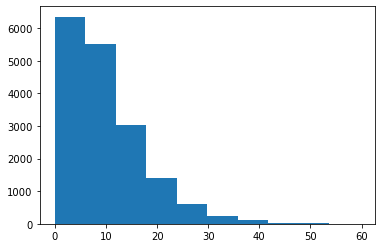

In [8]:
plt.hist(latdiff)

In [9]:
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a


def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    # Source: https://github.com/guillaume-chevalier/filtering-stft-and-laplace-transform
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [121]:
#n = 1000
#n=2210

for n in range(len(trajs)):
    f = np.abs(2*(1/24/3600)*np.sin(trajs[n].lat.mean()*np.pi/180))
    samp_freq = 1/3600
    nyq_freq = 0.5*samp_freq
    if len(trajs[n].u)>15:
        trajs[n].u_lp = butter_lowpass_filter(trajs[n].u, f/1.5, nyq_freq, order=4)
        trajs[n].v_lp = butter_lowpass_filter(trajs[n].v, f/1.5, nyq_freq, order=4)
    else:
        trajs[n].u_lp = np.NaN*trajs[n].u
        trajs[n].v_lp = np.NaN*trajs[n].v
        print(n)

11297
11323
12043
12159


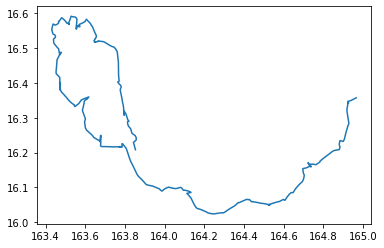

In [170]:
n=508
plt.plot(trajs[n].lon[0:480], trajs[n].lat[0:480])

(-1.0, 1.0)

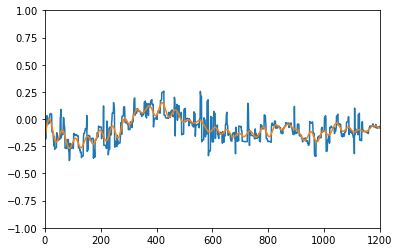

In [171]:
plt.plot(trajs[n].u)

#plt.plot(trajs[n].v)
plt.plot(trajs[n].u_lp)
#plt.xlim([200, 248])
plt.xlim([0, 1200])
plt.ylim([-1, 1])

In [138]:
u_lp = np.array([])
v_lp = np.array([])
    
for i in range(len(trajs)):
    u_lp = np.append(u_lp, trajs[i].u_lp)
    v_lp = np.append(v_lp, trajs[i].v_lp)  
    if np.mod(i, 1000)==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [139]:
len(u_lp)

165754333

In [157]:
ds_with_filtered = ds
ds_with_filtered

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 2578 2582 2583 ... 61493010 61493020
    lon                    (obs) float32 ...
    lat                    (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 5137 4289 1024 1095 ... 14769 16695 5209
    location_type          (traj) bool False False False ... True True True
    WMO                    (traj) int32 4400505 4400506 0 ... 1601501 1601502
    expno                  (traj) int32 9046 9046 46 9046 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2005-04-15 ... 2016-04-09
    deploy_lon             (traj) float32 -48.0 -52.0 -50.02 ... 65.0 75.4 54.3
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [160]:
ds_with_filtered['u_lp'] = xr.DataArray(u_lp, dims=['obs'])
ds_with_filtered['v_lp'] = xr.DataArray(v_lp, dims=['obs'])

In [161]:
ds_with_filtered

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 2578 2582 2583 ... 61493010 61493020
    lon                    (obs) float32 ...
    lat                    (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 5137 4289 1024 1095 ... 14769 16695 5209
    location_type          (traj) bool False False False ... True True True
    WMO                    (traj) int32 4400505 4400506 0 ... 1601501 1601502
    expno                  (traj) int32 9046 9046 46 9046 ... 20921 20921 20921
    deploy_date            (traj) datetime64[ns] 2005-04-15 ... 2016-04-09
    deploy_lon             (traj) float32 -48.0 -52.0 -50.02 ... 65.0 75.4 54.3
    ...                     ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
    u_lp                   (obs) float64 -0.1712 -0.1206 ... -0.02866 -0.0293
    v_lp                   (obs) float64 0.2094 0.1201 ... 0.09597 0.09665
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [162]:
ds_with_filtered.to_netcdf('data/gdp_fullset_with_filtered.nc')

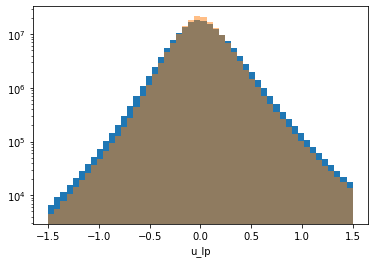

In [172]:
ds_with_filtered.ve.plot.hist(bins=np.linspace(-1.5,1.5,51))
ds_with_filtered.u_lp.plot.hist(bins=np.linspace(-1.5,1.5,51), alpha=0.5);
plt.yscale('log')

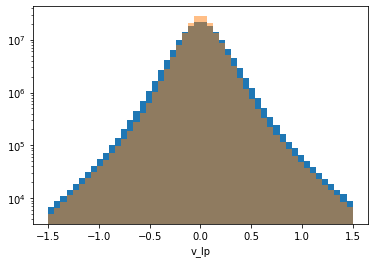

In [174]:
ds_with_filtered.vn.plot.hist(bins=np.linspace(-1.5,1.5,51))
ds_with_filtered.v_lp.plot.hist(bins=np.linspace(-1.5,1.5,51), alpha=0.5);
plt.yscale('log')